In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [239]:
#read csv file to dataframe
sleep_df = pd.read_csv('Sleep_Efficiency.csv')

sleep_df.head()

,ID,Age,Gender,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [241]:
#drop ID column
sleep_df = sleep_df.drop('ID', axis=1)

In [217]:
sleep_df.describe()

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


In [219]:
def plot_scatter(x, y):
    """
    Takes x and y parameters to plot a scatter plot
    """
    plt.figure(dpi=144)
    
    #plot scatter
    plt.scatter(x, y, color='blue')

    #formatting
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    #plt.savefig('scatter.png')
    plt.show()
    return

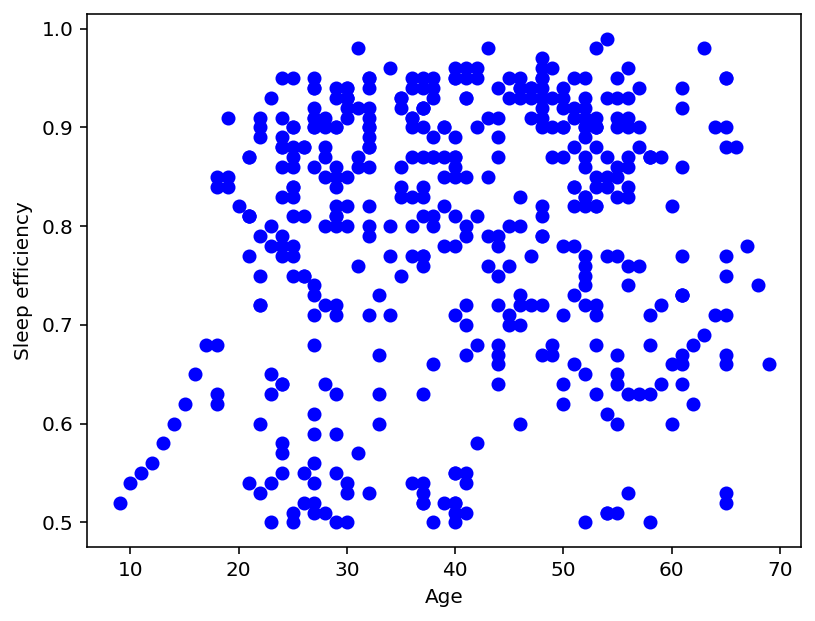

In [221]:
#scatter plot to visualize correlation between age and sleep efficiency

plot_scatter(sleep_df['Age'], sleep_df['Sleep efficiency'])

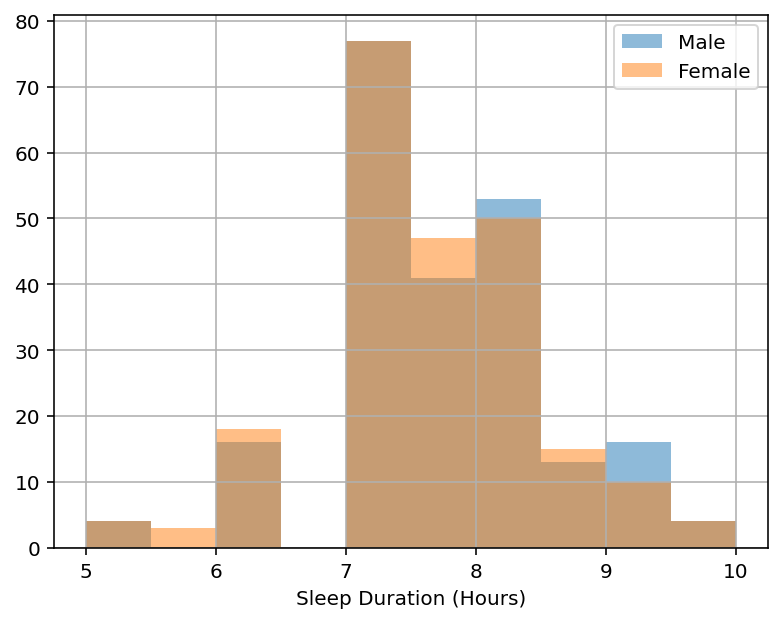

In [223]:
#plot histogram to visualise the distribution of sleep duration by gender
plt.figure(dpi=144)

sleep_df.groupby('Gender')['Sleep duration'].hist(alpha=0.5)

#formatting
plt.xlabel('Sleep Duration (Hours)')
plt.legend(['Male','Female'])

#plt.savefig('hist.png')
plt.show()

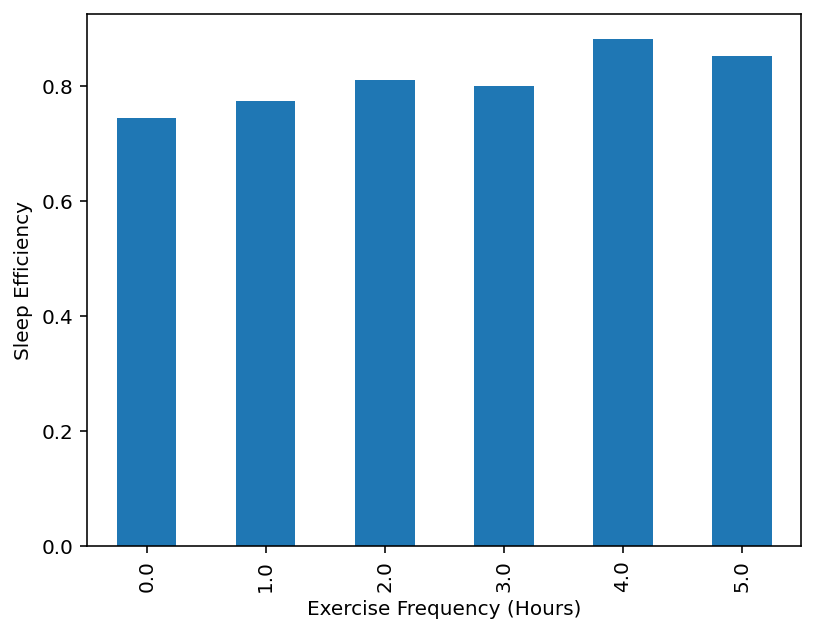

In [209]:
#plot bar chart to visualise sleep efficiency by exercise frequency
plt.figure(dpi=144)

df_exercise_sleep = sleep_df.groupby(['Exercise frequency'])['Sleep efficiency'].mean()
df_exercise_sleep.plot(kind='bar')

plt.xlabel('Exercise Frequency (Hours)')
plt.ylabel('Sleep Efficiency')

plt.show()

In [225]:
print(sleep_df.dtypes)

Age                         int64
Gender                     object
Sleep duration            float64
Sleep efficiency          float64
REM sleep percentage        int64
Deep sleep percentage       int64
Light sleep percentage      int64
Awakenings                float64
Caffeine consumption      float64
Alcohol consumption       float64
Smoking status             object
Exercise frequency        float64
dtype: object


In [227]:
def category_to_numerical(sleep_df):
    """
    Converts the categorical column values to numerical
    """
    for col in sleep_df.select_dtypes(include=['object']).columns:
        sleep_df[col] = pd.Categorical(sleep_df[col]).codes
    return sleep_df

In [229]:
def convert_percentage_columns(sleep_df):
    """
    Converts the columns with percentage values to decimal
    """
    for col in sleep_df.columns:
        if 'percentage' in col: 
            sleep_df[col] = sleep_df[col] / 100
    return sleep_df

In [231]:
def sleep_df_correlation(sleep_df, method):
    """
    Plots a correlation heatmap,
    taking the dataframe and method as parameters
    """
    #convert columns with categorical values to numeric
    sleep_df = category_to_numerical(sleep_df)

    #convert columns with percent in their title to decimal
    sleep_df = convert_percentage_columns(sleep_df)  

    fig, ax = plt.subplots(dpi=144)
    sns.heatmap(sleep_df.corr(method=method), ax=ax, annot=True, annot_kws={"size": 8}, fmt=".2f", cmap='RdBu')
    
    # change label font size
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.title(method.capitalize())
    #plt.savefig('corr.png', bbox_inches='tight')
    plt.show()
    return

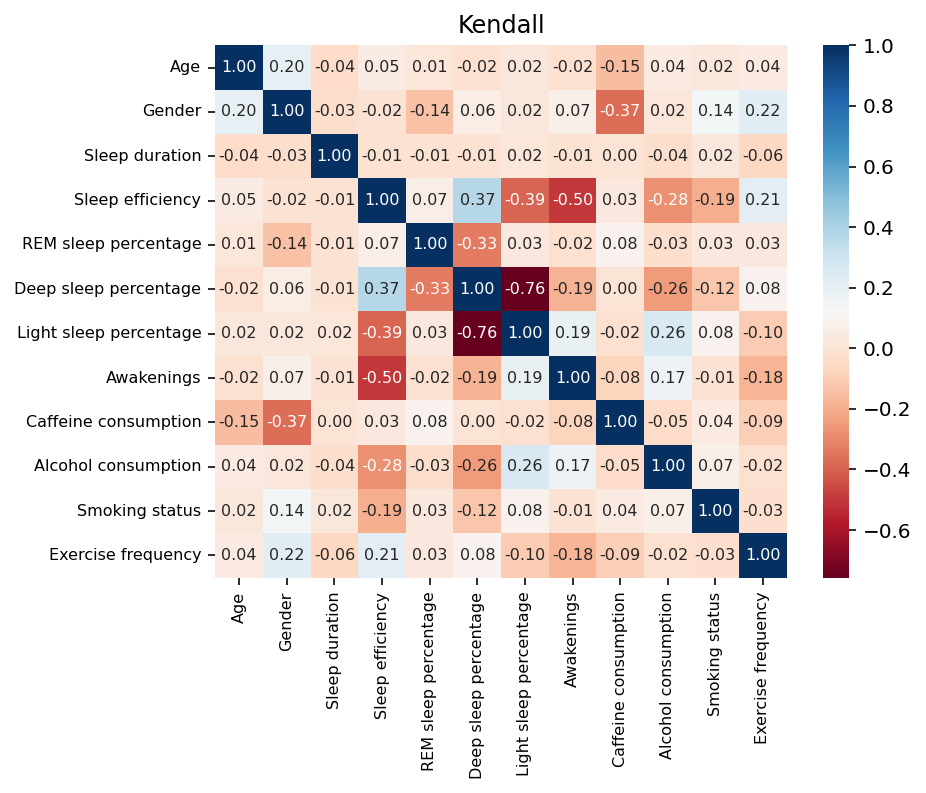

In [235]:
sleep_df_correlation(sleep_df, 'kendall')